In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initial Data
penguins = pd.read_csv("penguins.csv").dropna().reset_index().drop(columns=["Unnamed: 0", "index"])

# Helper Functions
def scatterWithLine(xAxis, yAxis): 
    # Create Diagram
    penguins.plot.scatter(x=xAxis, y=yAxis)

    # Calculate and Add Linear Regression to Diagram
    slope, intercept = np.polyfit(penguins[xAxis], penguins[yAxis], 1)
    plt.plot(penguins[xAxis], slope * penguins[xAxis] + intercept)

    # Add Correlation and Linear Regression to Legend
    plt.plot([], [], " ", label="Correlation: " + str(round(penguins[[xAxis, yAxis]].corr().iloc[1, 0], 2)))
    plt.plot([], [], " ", label="Linear Regression: " + str(round(slope, 2)) + "x+" + str(round(intercept, 2)))

    # Add Labels
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)

    # Show Diagram
    plt.legend()
    plt.show()

In [2]:
# 1. Weibliche Pinguine haben durchschnittlich niedrigere Merkmalsausprägungen als ihre männlichen Artgenossen.
penguins.groupby(["species", "sex"]).mean().round(2).iloc[:, 0:4]

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex                                                        
Adelie    female           37.26          17.62             187.79   
          male             40.39          19.07             192.41   
Chinstrap female           46.57          17.59             191.74   
          male             51.09          19.25             199.91   
Gentoo    female           45.56          14.24             212.71   
          male             49.47          15.72             221.54   

                  body_mass_g  
species   sex                  
Adelie    female      3368.84  
          male        4043.49  
Chinstrap female      3527.21  
          male        3938.97  
Gentoo    female      4679.74  
          male        5484.84

In [3]:
# 2. Die Merkmale der Adelie Pinguine hängen von der Insel ab. 
penguins.groupby(["species", "island"]).mean().round(2).iloc[0:3, 0:4]

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species island                                                        
Adelie  Biscoe              38.98          18.37             188.80   
        Dream               38.52          18.24             189.93   
        Torgersen           39.04          18.45             191.53   

                   body_mass_g  
species island                  
Adelie  Biscoe         3709.66  
        Dream          3701.36  
        Torgersen      3708.51

body_mass_g    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

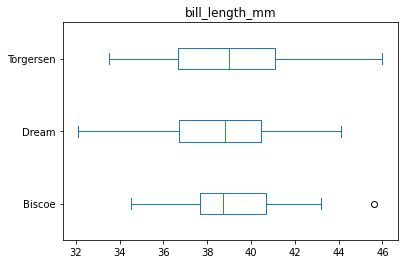

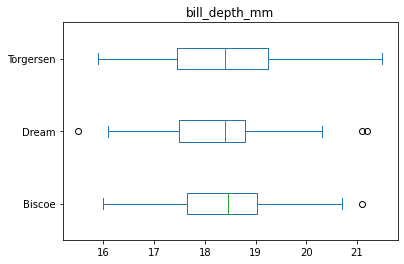

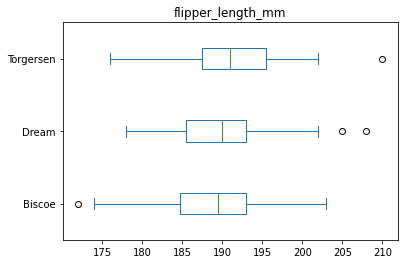

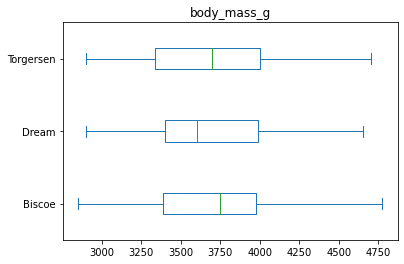

In [4]:
penguins[penguins["species"] == "Adelie"].plot.box(vert=False, column="bill_length_mm", by=["island"])
penguins[penguins["species"] == "Adelie"].plot.box(vert=False, column="bill_depth_mm", by=["island"])
penguins[penguins["species"] == "Adelie"].plot.box(vert=False, column="flipper_length_mm", by=["island"])
penguins[penguins["species"] == "Adelie"].plot.box(vert=False, column="body_mass_g", by=["island"])

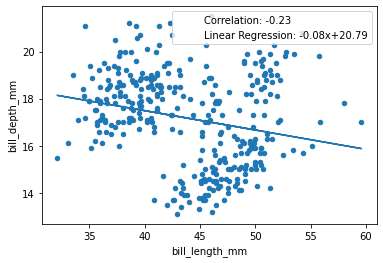

In [5]:
# 3. Die Schnabellänge hängt von der Schnabeltiefe ab.
scatterWithLine("bill_length_mm", "bill_depth_mm")

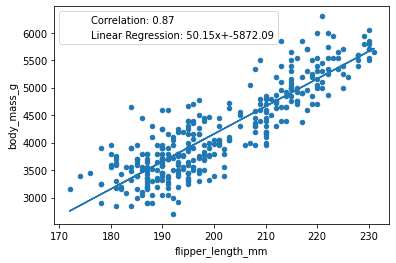

In [6]:
# 4. Die Länge der Schwimmflossen hängen von dem Gewicht ab.
scatterWithLine("flipper_length_mm", "body_mass_g")

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,
Adelie,Biscoe,32.1,15.5,172.0,2850.0,female,2007
Chinstrap,Dream,40.9,16.4,178.0,2700.0,female,2007
Gentoo,Biscoe,40.9,13.1,203.0,3950.0,female,2007


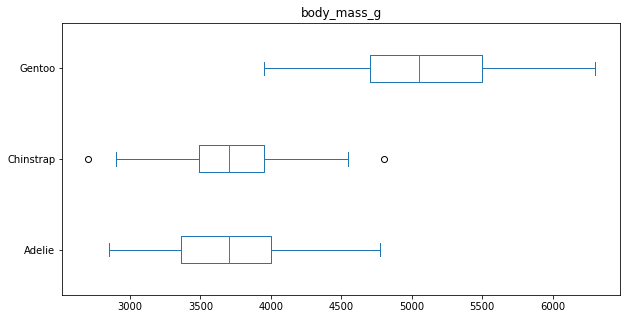

In [7]:
# 5. Wenn das Gewicht kleiner als 3900 gramm ist, dann handelt es sich nicht um die Spezies Gentoo
penguins.plot.box(vert=False, column="body_mass_g", by="species", figsize=(10,5))

penguins.groupby("species").min()

body_mass_g    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

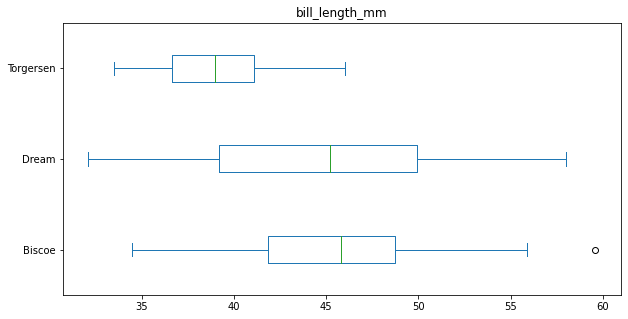

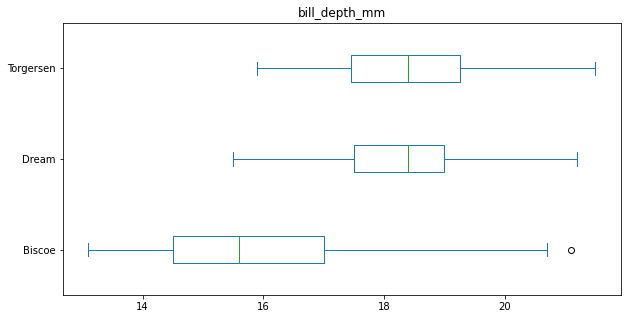

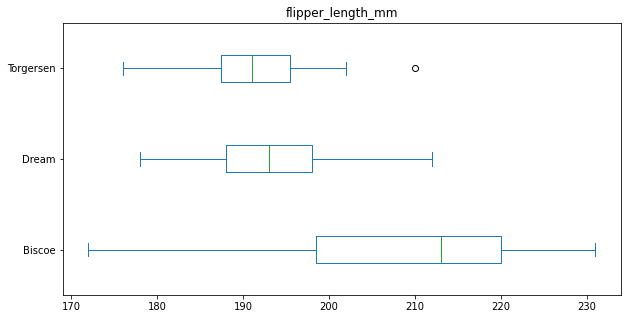

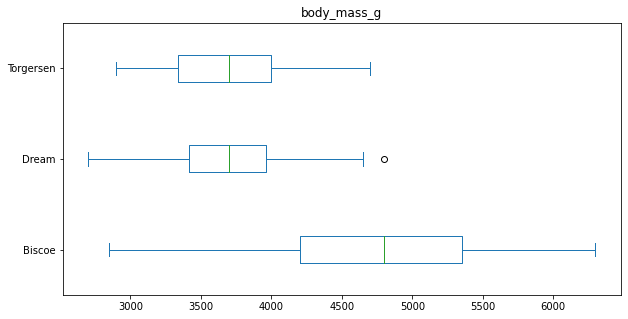

In [12]:
# 6. Jede Insel hat in mindestens einem Merkmal genau einen Ausreißer.
penguins.plot.box(vert=False, column="bill_length_mm", by="island", figsize=(10,5))
penguins.plot.box(vert=False, column="bill_depth_mm", by="island", figsize=(10,5))
penguins.plot.box(vert=False, column="flipper_length_mm", by="island", figsize=(10,5))
penguins.plot.box(vert=False, column="body_mass_g", by="island", figsize=(10,5))

In [9]:
penguins.groupby("sex").describe().round(2)

bill_length_mm                                               \
                count   mean   std   min    25%   50%    75%   max   
sex                                                                  
female          165.0  42.10  4.90  32.1  37.60  42.8  46.20  58.0   
male            168.0  45.85  5.37  34.6  40.98  46.8  50.32  59.6   

       bill_depth_mm         ... body_mass_g           year                 \
               count   mean  ...         75%     max  count     mean   std   
sex                          ...                                             
female         165.0  16.43  ...      4550.0  5200.0  165.0  2008.04  0.81   
male           168.0  17.89  ...      5312.5  6300.0  168.0  2008.04  0.81   

                                                
           min     25%     50%     75%     max  
sex                                             
female  2007.0  2007.0  2008.0  2009.0  2009.0  
male    2007.0  2007.0  2008.0  2009.0  2009.0  

[2 rows x 40 columns]

In [10]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [11]:
# Übersicht für alle Pinguine
penguins.min()
penguins.max()
penguins.mean()
penguins.std()

C:\Users\Jason\AppData\Local\Temp\ipykernel_19000\3402526058.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguins.mean()
C:\Users\Jason\AppData\Local\Temp\ipykernel_19000\3402526058.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguins.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64